<a href="https://colab.research.google.com/github/Elathius/nvidiapredict/blob/master/nvidiastockpredcit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import necessary packages
import numpy as np
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn import metrics


In [146]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2019, 1, 11)


df = web.DataReader("NVDA", 'yahoo', start, end)

#df = pd.read_csv('NVDA.csv')
#df.set_index('Date', inplace = True)
df.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-07,144.889999,136.429993,138.500000,143.399994,17729000.0,142.947525
2019-01-08,146.779999,136.899994,146.690002,139.830002,19650400.0,139.388794
2019-01-09,144.490005,139.860001,141.899994,142.580002,15431500.0,142.130142
2019-01-10,145.580002,139.360001,141.800003,145.229996,13078900.0,144.771759
2019-01-11,149.750000,143.210007,144.330002,148.830002,21869100.0,148.360397


(510, 6)

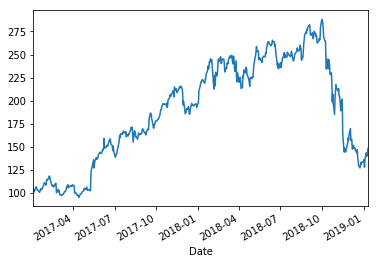

In [147]:

df["Adj Close"].plot()
df.shape

In [0]:
window_size=32
num_samples=len(df)-window_size

# Get indices of access for the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)


data = df['Adj Close'].values[indices] # Create the 2D matrix of training samples
x = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day


split_fraction=0.75
ind_split=int(split_fraction*num_samples)


x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

x_train_orig = x_train

**Performance functions:**

In [0]:
def performance(model):
  print("MAE :", metrics.mean_absolute_error(y_test,model).round(5))
  print("MSE :", metrics.mean_squared_error(y_test,model).round(5))
  print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,model)).round(5))
  
def perfplot (model,colr='gray',linecolr='red'):
  plt.scatter(model, y_test, color=colr)
  plt.plot(y_test, y_test, color=linecolr, linewidth=2)
  
def compareall(modelone,model):
  print("Percent difference from baseline metrics: Lower is better (Error minimizing)")
  print("MAE % :", (metrics.mean_absolute_error(y_test,modelone).round(5)/ metrics.mean_absolute_error(y_test,model).round(5) )*100 )
  print("MSE % :", (metrics.mean_squared_error(y_test,modelone).round(5) / metrics.mean_squared_error(y_test,model).round(5) )*100 )
  print("RMSE %:", (np.sqrt( metrics.mean_absolute_error(y_test,modelone) )/np.sqrt( metrics.mean_absolute_error(y_test,model) )*100).round(5))

In [0]:
ypredlag = np.roll(y_test,1)

Base line metrics:

In [151]:
performance(ypredlag)

MAE : 6.11452
MSE : 139.10746
RMSE: 11.79438


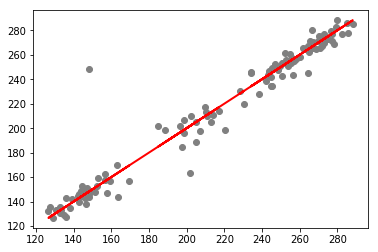

In [152]:
perfplot(ypredlag)

In [153]:
modellinear = LinearRegression()
modellinear.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
ypredlinear = modellinear.predict(x_test)

In [155]:
performance(ypredlinear)

MAE : 5.84323
MSE : 69.84169
RMSE: 8.35713


Ridge Regression

In [0]:
modelridge = Ridge()
modelridge.fit(x_train,y_train)

ypredridge = modelridge.predict(x_test)

MAE : 5.84308
MSE : 69.84092
RMSE: 8.35709


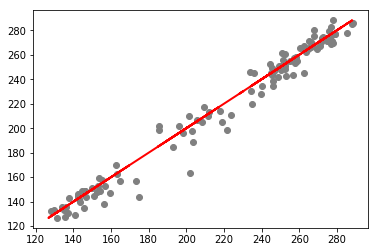

In [157]:
performance(ypredridge)
perfplot(ypredridge)

In [0]:
modellasso = Lasso()
modellasso.fit(x_train,y_train)

ypredlasso = modellasso.predict(x_test)


MAE : 5.56354
MSE : 64.21149
RMSE: 8.01321


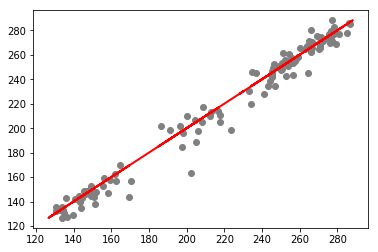

In [159]:
performance(ypredlasso)
perfplot(ypredlasso)

Polynomial Regression:

In [160]:
modelpoly = PolynomialFeatures(degree = 2)
modelpoly.fit_transform(x_train)

modellinear.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [161]:
ypredpoly = modellinear.predict(x_test)
print(x_test[0])

[263.90481567 261.66540527 261.04830933 259.39605713 261.34686279
 261.16775513 265.65658569 264.01431274 263.84509277 258.94824219
 261.07818604 255.90260315 249.77151489 237.99705505 240.85359192
 234.61302185 239.72889709 235.78749084 241.10240173 235.7277832
 241.59010315 246.16851807 248.07948303 252.06069946 246.36756897
 250.05018616 248.14918518 247.03442383 252.49865723 250.51797485
 250.84645081 249.71180725]


In [162]:
performance(ypredpoly)

MAE : 5.84323
MSE : 69.84169
RMSE: 8.35713


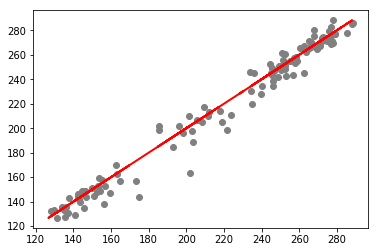

In [163]:
perfplot(ypredpoly)

Gradient Boosting:

MAE : 12.10686
MSE : 209.4408
RMSE: 14.47207


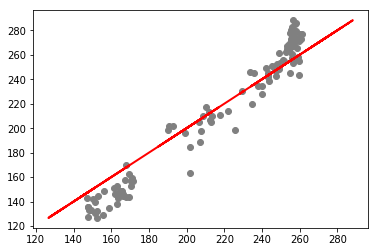

In [164]:
modelgbr = GradientBoostingRegressor()
modelgbr.fit(x_train, y_train)

ypredgbr = modelgbr.predict(x_test)

performance(ypredgbr)
perfplot(ypredgbr)

Comparision:

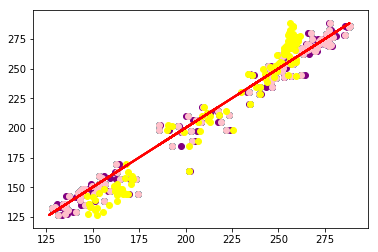

In [165]:
perfplot(ypredlinear,colr='blue')
perfplot(ypredridge,colr= 'green')
perfplot(ypredlasso, colr='purple')
perfplot(ypredpoly, colr='pink')
perfplot(ypredgbr, colr='yellow')

In [166]:
#Linear
compareall(ypredlinear,ypredlag)

Percent difference from baseline metrics: Lower is better (Error minimizing)
MAE % : 95.56318402752792
MSE % : 50.20700543306592
RMSE %: 97.75642


In [167]:
#Ridge
compareall(ypredridge,ypredlag)

Percent difference from baseline metrics: Lower is better (Error minimizing)
MAE % : 95.56073085050012
MSE % : 50.206451904161
RMSE %: 97.75512


In [168]:
#Lasso
compareall(ypredlasso,ypredlag)

Percent difference from baseline metrics: Lower is better (Error minimizing)
MAE % : 90.98899014149924
MSE % : 46.15963083503933
RMSE %: 95.38811


In [169]:
#Poly
compareall(ypredpoly,ypredlag)

Percent difference from baseline metrics: Lower is better (Error minimizing)
MAE % : 95.56318402752792
MSE % : 50.20700543306592
RMSE %: 97.75642


In [170]:
#GradientBoosting
compareall(ypredgbr,ypredlag)

Percent difference from baseline metrics: Lower is better (Error minimizing)
MAE % : 198.00180553829244
MSE % : 150.56043723320084
RMSE %: 140.71304
